In [1]:
conda install -c sebp scikit-survival

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\joyce.hsieh\Anaconda3

  added / updated specs:
    - scikit-survival


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2022.05  |           py39_0           7 KB
    aiohttp-3.8.1              |   py39h2bbff1b_1         496 KB
    aiosignal-1.2.0            |     pyhd3eb1b0_0          12 KB
    anaconda-custom            |           py39_1           4 KB
    argon2-cffi-bindings-21.2.0|   py39h2bbff1b_0          36 KB
    asttokens-2.0.5            |     pyhd3eb1b0_0          20 KB
    async-timeout-4.0.1        |     pyhd3eb1b0_0          10 KB
    automat-20.2.0             |             py_0          31 KB
    boto3-1.24.28              


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.11=py39_0
  - defaults/win-64::bkcharts==0.2=py39haa95532_0
  - defaults/noarch::dask==2021.10.0=pyhd3eb1b0_0
  - defaults/noarch::seaborn==0.11.2=pyhd3eb1b0_0
  - defaults/win-64::statsmodels==0.12.2=py39h2bbff1b_0

The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.11=py39_0
  - defaults/win-64::bkcharts==0.2=py39haa95532_0
  - defaults/noarch::dask==2021.10.0=pyhd3eb1b0_0
  - defaults/noarch::seaborn==0.11.2=pyhd3eb1b0_0
  - defaults/win-64::statsmodels==0.12.2=py39h2bbff1b_0


datashader-0.14.1    | 16.5 MB   | ########5  |  86% 
datashader-0.14.1    | 16.5 MB   | ########6  |  86% 
datashader-0.14.1    | 16.5 MB   | ########6  |  87% 
datashader-0.14.1    | 16.5 MB   | ########6  |  87% 
datashader-0.14.1    | 16.5 MB   | ########7  |  87% 
datashader-0.14.1    | 16.5 MB   | ########7  |  88% 
datashader-0.14.1    | 16.5 MB   | ########8  |  88% 
datashader-0.14.1    | 16.5 MB   | ########8  |  89% 
datashader-0.14.1    | 16.5 MB   | ########9  |  89% 
datashader-0.14.1    | 16.5 MB   | ########9  |  90% 
datashader-0.14.1    | 16.5 MB   | #########  |  90% 
datashader-0.14.1    | 16.5 MB   | #########  |  91% 
datashader-0.14.1    | 16.5 MB   | #########1 |  91% 
datashader-0.14.1    | 16.5 MB   | #########1 |  92% 
datashader-0.14.1    | 16.5 MB   | #########2 |  92% 
datashader-0.14.1    | 16.5 MB   | #########2 |  93% 
datashader-0.14.1    | 16.5 MB   | #########3 |  93% 
datashader-0.14.1    | 16.5 MB   | #########3 |  94% 
datashader-0.14.1    | 16.5 

conda-4.12.0         | 14.5 MB   | ####5      |  45% 
conda-4.12.0         | 14.5 MB   | ####5      |  46% 
conda-4.12.0         | 14.5 MB   | ####6      |  46% 
conda-4.12.0         | 14.5 MB   | ####6      |  47% 
conda-4.12.0         | 14.5 MB   | ####7      |  47% 
conda-4.12.0         | 14.5 MB   | ####7      |  48% 
conda-4.12.0         | 14.5 MB   | ####8      |  48% 
conda-4.12.0         | 14.5 MB   | ####8      |  49% 
conda-4.12.0         | 14.5 MB   | ####9      |  50% 
conda-4.12.0         | 14.5 MB   | #####      |  50% 
conda-4.12.0         | 14.5 MB   | #####      |  51% 
conda-4.12.0         | 14.5 MB   | #####1     |  51% 
conda-4.12.0         | 14.5 MB   | #####1     |  52% 
conda-4.12.0         | 14.5 MB   | #####2     |  52% 
conda-4.12.0         | 14.5 MB   | #####2     |  53% 
conda-4.12.0         | 14.5 MB   | #####3     |  53% 
conda-4.12.0         | 14.5 MB   | #####3     |  54% 
conda-4.12.0         | 14.5 MB   | #####4     |  54% 
conda-4.12.0         | 14.5 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

set_config(display="text")  # displays text representation of estimators

In [11]:
X, y = load_gbsg2()

grade_str = X.loc[:, "tgrade"].astype(object).values[:, np.newaxis]
grade_num = OrdinalEncoder(categories=[["I", "II", "III"]]).fit_transform(grade_str) # tgrade : 羅馬符號

X_no_grade = X.drop("tgrade", axis=1)
Xt = OneHotEncoder().fit_transform(X_no_grade)
Xt.loc[:, "tgrade"] = grade_num  # 加回tgrade欄位

# OneHotEncoder : 適用無次序型類別資料，如:國家、性別
# LabelEncoder : 適用有次序型類別資料

In [12]:
print(X.head(5))
print(Xt.head(5))

    age  estrec horTh menostat  pnodes  progrec tgrade  tsize
0  70.0    66.0    no     Post     3.0     48.0     II   21.0
1  56.0    77.0   yes     Post     7.0     61.0     II   12.0
2  58.0   271.0   yes     Post     9.0     52.0     II   35.0
3  59.0    29.0   yes     Post     4.0     60.0     II   17.0
4  73.0    65.0    no     Post     1.0     26.0     II   35.0
    age  estrec  horTh=yes  menostat=Post  pnodes  progrec  tsize  tgrade
0  70.0    66.0        0.0            1.0     3.0     48.0   21.0     1.0
1  56.0    77.0        1.0            1.0     7.0     61.0   12.0     1.0
2  58.0   271.0        1.0            1.0     9.0     52.0   35.0     1.0
3  59.0    29.0        1.0            1.0     4.0     60.0   17.0     1.0
4  73.0    65.0        0.0            1.0     1.0     26.0   35.0     1.0


In [47]:
print(y)

[( True, 1814.) ( True, 2018.) ( True,  712.) ( True, 1807.)
 ( True,  772.) ( True,  448.) (False, 2172.) (False, 2161.)
 ( True,  471.) (False, 2014.) ( True,  577.) ( True,  184.)
 (False, 1840.) (False, 1842.) (False, 1821.) ( True, 1371.)
 ( True,  707.) (False, 1743.) (False, 1781.) ( True,  865.)
 ( True, 1684.) (False, 1701.) (False, 1701.) (False, 1693.)
 ( True,  379.) ( True, 1105.) ( True,  548.) ( True, 1296.)
 (False, 1483.) (False, 1570.) (False, 1469.) (False, 1472.)
 (False, 1342.) (False, 1349.) ( True, 1162.) (False, 1342.)
 ( True,  797.) (False, 1232.) (False, 1230.) (False, 1205.)
 (False, 1090.) (False, 1095.) ( True,  449.) (False,  972.)
 (False,  825.) (False, 2438.) (False, 2233.) ( True,  286.)
 (False, 1861.) ( True, 1080.) ( True, 1521.) (False, 1693.)
 ( True, 1528.) ( True,  169.) ( True,  272.) ( True,  731.)
 (False, 2059.) (False, 1853.) (False, 1854.) (False, 1645.)
 ( True,  544.) (False, 1666.) ( True,  353.) (False, 1791.)
 (False, 1685.) ( True, 

## Split 80%-train data, 20%-test data

In [14]:
random_state = 20 # set.seed()

X_train, X_test, y_train, y_test = train_test_split(
    Xt, y, test_size=0.2, random_state=random_state)

## Training

In [15]:
rsf = RandomSurvivalForest(n_estimators=1000,      ## create 1000 trees
                           min_samples_split=10,   ## min sapmle needed to be a leaf node
                           min_samples_leaf=15,    ## min nodes
                           n_jobs=-1,
                           random_state=random_state)
rsf.fit(X_train, y_train)

RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10,
                     n_estimators=1000, n_jobs=-1, random_state=20)

In [16]:
rsf.score(X_test, y_test)  ## concordance index (C-index)

0.6751347190146266

## Predicting

In [17]:
X_test_sorted = X_test.sort_values(by=["pnodes", "age"]) ## 對pnodes, ages排序
X_test_sel = pd.concat((X_test_sorted.head(3), X_test_sorted.tail(3)))

X_test_sel

,age,estrec,horTh=yes,menostat=Post,pnodes,progrec,tsize,tgrade
119,33.0,0.0,0.0,0.0,1.0,26.0,35.0,2.0
574,34.0,37.0,0.0,0.0,1.0,0.0,40.0,2.0
421,36.0,14.0,0.0,0.0,1.0,76.0,36.0,1.0
580,52.0,57.0,1.0,1.0,21.0,11.0,35.0,1.0
8,80.0,59.0,0.0,1.0,30.0,0.0,39.0,1.0
226,72.0,1091.0,1.0,1.0,36.0,2.0,34.0,2.0


In [20]:
## The predicted risk scores indicate that risk for the last three patients > that of the first three patients.

pd.Series(rsf.predict(X_test_sel))

0     88.918340
1     96.332753
2     77.397563
3    162.866860
4    188.722702
5    172.462054
dtype: float64

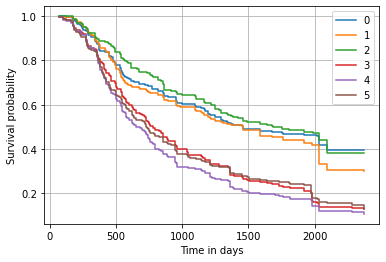

In [19]:
surv = rsf.predict_survival_function(X_test_sel, return_array=True)  ## 這六位的predict result

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

## Cumulative hazard function

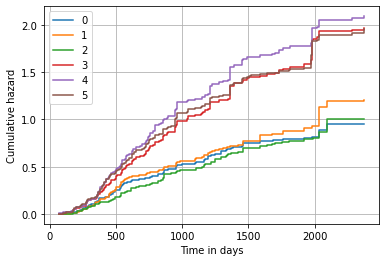

In [22]:
surv = rsf.predict_cumulative_hazard_function(X_test_sel, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

## Feature Importance

In [23]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rsf, X_test, y_test, n_repeats=15, random_state=random_state
)

In [24]:
pd.DataFrame(
    {k: result[k] for k in ("importances_mean", "importances_std",)},
    index=X_test.columns
).sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
pnodes,0.080203,0.027005
age,0.021016,0.007680
progrec,0.012882,0.017742
horTh=yes,0.008725,0.002822
tgrade,0.006017,0.003802
menostat=Post,0.002374,0.001227
tsize,-0.002335,0.008034
estrec,-0.004811,0.009842


# Lung cancer

In [86]:
## read dataset
# df = pd.read_excel("lung_cancer_dataset.xlsx", sheet_name = "lung_cancer_dataset") # None: default the all sheet
# print(df)
data= pd.read_csv("lung_cancer_dataset.csv")
data

TypeError: 'list' object is not callable

In [37]:
df.head(3)
df.tail(3)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
225,32.0,105,1,75,2,2.0,60.0,70.0,1025.0,5.0
226,6.0,174,1,66,1,1.0,90.0,100.0,1075.0,1.0
227,22.0,177,1,58,2,1.0,80.0,90.0,1060.0,0.0


In [38]:
df.describe()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,227.000000,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,11.088106,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,8.303491,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,3.000000,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,11.000000,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,16.000000,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,33.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


In [76]:
## X 
df_no_id = df.drop(["inst", "time", "status"], axis = 1)
print(df_no_id.head(3))

## Y
df_y = df.drop(["inst", "age", "sex", "ph.ecog", "ph.karno", "pat.karno", "meal.cal", "wt.loss"], axis = 1)
df_y.loc[df_y['status'] == 1, 'new_status' ] = False
df_y.loc[df_y['status'] == 2, 'new_status' ] = True
print(df_y.head(3))

TypeError: isinstance() arg 2 must be a type or tuple of types

In [75]:
#print(df_y.values)
#df1 = pd.DataFrame(df_y.values)
#df1

df_yy = df_y.loc[:, ["new_status", "time"]].values
print(df_yy)
df_yy = np.dtype = ([('new_status', bool), ('time', float)])



[[True 306]
 [True 455]
 [False 1010]
 [True 210]
 [True 883]
 [False 1022]
 [True 310]
 [True 361]
 [True 218]
 [True 166]
 [True 170]
 [True 654]
 [True 728]
 [True 71]
 [True 567]
 [True 144]
 [True 613]
 [True 707]
 [True 61]
 [True 88]
 [True 301]
 [True 81]
 [True 624]
 [True 371]
 [True 394]
 [True 520]
 [True 574]
 [True 118]
 [True 390]
 [True 12]
 [True 473]
 [True 26]
 [True 533]
 [True 107]
 [True 53]
 [True 122]
 [True 814]
 [False 965]
 [True 93]
 [True 731]
 [True 460]
 [True 153]
 [True 433]
 [True 145]
 [True 583]
 [True 95]
 [True 303]
 [True 519]
 [True 643]
 [True 765]
 [True 735]
 [True 189]
 [True 53]
 [True 246]
 [True 689]
 [True 65]
 [True 5]
 [True 132]
 [True 687]
 [True 345]
 [True 444]
 [True 223]
 [True 175]
 [True 60]
 [True 163]
 [True 65]
 [True 208]
 [False 821]
 [True 428]
 [True 230]
 [False 840]
 [True 305]
 [True 11]
 [True 132]
 [True 226]
 [True 426]
 [True 705]
 [True 363]
 [True 11]
 [True 176]
 [True 791]
 [True 95]
 [False 196]
 [True 167]
 [

In [54]:
pd.crosstab(index=df['status'], columns='count')  # 1 : censor, 2 : dead

col_0,count
status,
1,63
2,165


In [55]:
# cross table
pd.crosstab(index=df['status'], columns=df['age'])

age,39,40,41,42,43,44,45,46,47,48,...,71,72,73,74,75,76,77,80,81,82
status,,,,,,,,,,,,,,,,,,,,,
1,2,0,1,1,1,2,1,0,0,1,...,1,0,0,4,1,0,2,0,0,0
2,0,1,0,0,0,3,0,1,1,3,...,6,7,6,6,4,5,0,2,1,1


## Spilt traing data, testing data

In [73]:
random_state = 20 # set.seed()

X_train, X_test, y_train, y_test = train_test_split(
    df_no_id, df_yy, test_size=0.2, random_state=random_state)

#  y must be a structured array with the first field being a binary class event indicator and the second field the time of the event/censoring

In [74]:
rsf = RandomSurvivalForest(n_estimators=1000,      ## create 1000 trees
                           min_samples_split=10,   ## min sapmle needed to be a leaf node
                           min_samples_leaf=10,    ## min nodes
                           n_jobs=-1,
                           random_state=random_state)
rsf.fit(X_train, y_train)

ValueError: y must be a structured array with the first field being a binary class event indicator and the second field the time of the event/censoring

In [84]:
if isinstance(names, type(list))


SyntaxError: invalid syntax (Temp/ipykernel_39664/3695586577.py, line 1)

In [58]:
from lifelines import datasets
rossi = datasets.load_rossi()
# Attention: duration column must be index 0, event column index 1 in y
y = rossi.loc[:, ["week", "arrest"]]
print(y.head(2))
#X = rossi.drop(["arrest", "week"], axis=1)
#X, X_test, y, y_test = train_test_split(X, y, test_size=0.25)

ModuleNotFoundError: No module named 'lifelines'